<div style="border:solid green 2px; padding: 20px">
<b>Iteration - 1</b><br>
<b>Reviewer’s comments</b><br>
  Hello Olivia!,
    
I am Alexangel, your current reviewer,

 First of all, congratulations on submitting your project! 🎉
 
  Taking this step is a big part of your journey into the world of Data, and it’s clear you’re putting in the effort to succeed.
  
  Our team is here to support your growth, and to help you get the most out of this experience, I’ve returned your project with some suggestions for improvement.
  
You can contact me via Tripleten Hub for further clarification. This information is described below.


**What Was Great**:
- Excellent job on following the structure of the project.
- You’ve shown strong skills in testing the models in this project.

 
**Areas to Improve:**
 - To fully meet the project criteria, you'll need to fix the red comments I left below, I also made some comments and recommendations about how to fix them.
 - Consider adding brief comments after the analysis of every dataset or chart to make your project even more integral.

 Don’t be discouraged - this is all part of the learning process! Take your time to review the feedback and make the necessary adjustments. Resubmit when you’re ready, and I’m confident you’ll nail it on the next go. Remember, every challenge is an opportunity to grow. You’ve got this! 🏄
 
-------------------------------------------------------------------------------------------------------------
Please find my comments below—**I kindly ask that you do not move, modify, or delete them**.
You can find my comments highlighted in green, yellow, or red boxes like this:

<div class="alert alert-success"; style="border-left: 7px solid green">
<b>Reviewer's comment</b> 
    
Such comment will mark efficient solutions and good ideas that can be used in other projects. It will also point at the document formatting, which was done for you in this project, but you will need to do it yourself in the future ones.
</div>


<div class="alert alert-warning"; style="border-left: 7px solid gold">
<b>Reviewer's comment</b> 
    
The parts marked with yellow comments indicate that there is room for optimisation. Though the correction is not necessary it is good if you implement it.
</div>


<div class="alert alert-danger"; style="border-left: 7px solid red">
<b>Reviewer's comment</b> 
    
If you see such a comment, it means that there is a problem that needs to be fixed. Please note that I won't be able to accept your project until the issue is resolved.
</div>
You can answer me by using this:
<div class="alert alert-info"; style="border-left: 7px solid blue">
<b>Student’s Comment</b></div>
</div>


***Name of the reviewer***: Alexangel Bracho

***Reviewer’s Tripleten Hub link*** : [reviewer's link](https://hub.tripleten.com/u/6b1cbe37)

------------------------------------------------------------------------------------------------------------------------------------

</div>


<div class="alert alert-block alert-info">
<b>Reviewer's comment v2:</b> </a>

Hello Olivia!

I added a comment for you below. Great work so far, and I’m looking forward to your next submission. 

Good luck!
    
</div>

<div class="alert alert-block alert-success">
<b>Reviewer's comment v3:</b> </a>

Your submission is looking awesome! your code is clean, you build a final performances table and you showcase your findings, I'm approving this submission!

Looking forward to reviewing your future work!

Congrats and good luck!
    
</div>

Rusty Bargain used car sales service is developing an app to attract new customers. In that app, you can quickly find out the market value of your car. You have access to historical data: technical specifications, trim versions, and prices. You need to build the model to determine the value. 

Rusty Bargain is interested in:

- the quality of the prediction;
- the speed of the prediction;
- the time required for training



### 1. Introduction / Project Overview

Rusty Bargain, a used car sales service, is developing an app to quickly estimate the market value of cars. The company has provided **historical car data** containing technical specifications, trim versions, and prices.

The company wants models that balance three things:
- **Quality of predictions** (accurate price estimates)
- **Speed of predictions** (fast answers for app users)
- **Training time** (models should be efficient to train)

#### **Approach summary:**
We will compare several machine learning models:
- **Linear Regression** (baseline sanity check)
- **Decision Tree** and **Random Forest** (tree-based methods)
- **LightGBM** (required gradient boosting method) and optionally **CatBoost**

We will evaluate them with **RMSE** for accuracy and also compare their training and prediction speed.
This comparison matters because it will help Rusty Bargain choose the **best model for their production app** — one that balances accuracy, efficiency, and speed to deliver a smooth user experience.


<div class="alert alert-block alert-success">
<b>Reviewer's comment</b> <a class="tocSkip"></a>

Good introduction.

</div>

In [1]:
# Load libraries

import pandas as pd
import numpy as np

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Machine learning
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from lightgbm import LGBMRegressor
from catboost import CatBoostRegressor

# Utilities
from time import perf_counter

# Optional boosting library
from xgboost import XGBRegressor  # optional, but good for extra comparison

# Preprocessing for categorical features (needed for some models)
from sklearn.preprocessing import OneHotEncoder, LabelEncoder

## Data preparation

In [2]:
# Load data
df = pd.read_csv('/datasets/car_data.csv')

# Quick look
display(df.head())

print("Shape:", df.shape)
display(df.isna().mean().sort_values(ascending=False).head(12))

# Check for missing values
print("\nMissing values (fraction of rows):")
display(df.isna().mean().sort_values(ascending=False).head(12))

# Quick info on column types
print("\nData types:")
print(df.dtypes.value_counts())

# Summary statistics for numeric columns
print("\nSummary statistics:")
display(df.describe().T)


,DateCrawled,Price,VehicleType,RegistrationYear,Gearbox,Power,Model,Mileage,RegistrationMonth,FuelType,Brand,NotRepaired,DateCreated,NumberOfPictures,PostalCode,LastSeen
0,24/03/2016 11:52,480,NaN,1993,manual,0,golf,150000,0,petrol,volkswagen,NaN,24/03/2016 00:00,0,70435,07/04/2016 03:16
1,24/03/2016 10:58,18300,coupe,2011,manual,190,NaN,125000,5,gasoline,audi,yes,24/03/2016 00:00,0,66954,07/04/2016 01:46
2,14/03/2016 12:52,9800,suv,2004,auto,163,grand,125000,8,gasoline,jeep,NaN,14/03/2016 00:00,0,90480,05/04/2016 12:47
3,17/03/2016 16:54,1500,small,2001,manual,75,golf,150000,6,petrol,volkswagen,no,17/03/2016 00:00,0,91074,17/03/2016 17:40
4,31/03/2016 17:25,3600,small,2008,manual,69,fabia,90000,7,gasoline,skoda,no,31/03/2016 00:00,0,60437,06/04/2016 10:17


Shape: (354369, 16)


NotRepaired          0.200791
VehicleType          0.105794
FuelType             0.092827
Gearbox              0.055967
Model                0.055606
DateCrawled          0.000000
Price                0.000000
RegistrationYear     0.000000
Power                0.000000
Mileage              0.000000
RegistrationMonth    0.000000
Brand                0.000000
dtype: float64


Missing values (fraction of rows):


NotRepaired          0.200791
VehicleType          0.105794
FuelType             0.092827
Gearbox              0.055967
Model                0.055606
DateCrawled          0.000000
Price                0.000000
RegistrationYear     0.000000
Power                0.000000
Mileage              0.000000
RegistrationMonth    0.000000
Brand                0.000000
dtype: float64


Data types:
object    9
int64     7
dtype: int64

Summary statistics:


,count,mean,std,min,25%,50%,75%,max
Price,354369.0,4416.656776,4514.158514,0.0,1050.0,2700.0,6400.0,20000.0
RegistrationYear,354369.0,2004.234448,90.227958,1000.0,1999.0,2003.0,2008.0,9999.0
Power,354369.0,110.094337,189.850405,0.0,69.0,105.0,143.0,20000.0
Mileage,354369.0,128211.172535,37905.341530,5000.0,125000.0,150000.0,150000.0,150000.0
RegistrationMonth,354369.0,5.714645,3.726421,0.0,3.0,6.0,9.0,12.0
NumberOfPictures,354369.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
PostalCode,354369.0,50508.689087,25783.096248,1067.0,30165.0,49413.0,71083.0,99998.0


#### **Key Data Insights**

**Dataset Overview:**
- **Size:** 354,369 cars with 16 features
- **Mix of data types:** 9 categorical (object) and 7 numerical (int64) features

**Missing Data Patterns:**
- **NotRepaired:** 20% missing - significant feature loss
- **VehicleType:** 11% missing - important categorical feature
- **FuelType:** 9% missing - affects model performance
- **Gearbox and Model:** ~6% missing each

**Data Quality Issues Requiring Attention:**
- **RegistrationYear:** Invalid values (1000-9999 range) - needs cleaning
- **Power:** Unrealistic maximum (20,000 HP) - likely data entry errors
- **RegistrationMonth:** Contains 0 (invalid month) - should be 1-12
- **NumberOfPictures:** All zeros (std=0) - **can be dropped**
- **Price:** Contains $0 values - may need filtering
- **PostalCode**: can be dropped as it doesn't contribute to price insights

**Business Insights:**
- **Price distribution:** Right-skewed (median 2,700 Euros vs mean 4,417 Euros) - **will confirm currency**
- **Car age:** Most cars from 1999-2008 (reasonable used car range)
- **Mileage pattern:** 75% capped at 150,000 km - suggests data collection limit

<div class="alert alert-block alert-success">
<b>Reviewer's comment</b> <a class="tocSkip"></a>

Good preview of the data. Also great insights.

</div>

In [3]:
# Confirm currency type by checking other data points

print("Sample postal codes:", df['PostalCode'].head())
print("Top brands:", df['Brand'].value_counts().head())
print("Price statistics:")
print(f"Median: {df['Price'].median()}")
print(f"Mean: {df['Price'].mean():.0f}")

Sample postal codes: 0    70435
1    66954
2    90480
3    91074
4    60437
Name: PostalCode, dtype: int64
Top brands: volkswagen       77013
opel             39931
bmw              36914
mercedes_benz    32046
audi             29456
Name: Brand, dtype: int64
Price statistics:
Median: 2700.0
Mean: 4417


**Based on car brands (Volkswagen, Audi, Skoda), distances logged in km, German postal codes, and price points being lower than expected for USD; we can assume this is German-based data and the pricing is likely in Euros.**

In [4]:
# Data preprocessing & Cleaning

# Create working copy for modifications
df_clean = df.copy()

# Drop unhelpful columns that don't help with price prediction
cols_to_drop = ['NumberOfPictures', 'DateCrawled', 'DateCreated', 'LastSeen']
df_clean = df_clean.drop(columns=[c for c in cols_to_drop if c in df_clean.columns])

# Handle missing values 
cat_fill_cols = ['NotRepaired', 'VehicleType', 'FuelType', 'Gearbox', 'Model', 'PostalCode']
for c in cat_fill_cols:
    if c in df_clean.columns:
        df_clean[c] = df_clean[c].fillna('unknown')

# Filter prices to remove invalid/unrealistic values
mask_price = df_clean['Price'] > 0

# Filter registration year for realistic range
mask_year = df_clean['RegistrationYear'].between(1980, 2020, inclusive='both')

# Filter out unrealistic power ranges
mask_power = df_clean['Power'].between(10, 500, inclusive='both')

# Filter out zeros from RegistrationMonth - must be 1-12
mask_month = df_clean['RegistrationMonth'].between(1, 12, inclusive='both')

# Apply all filters
df_clean = df_clean[mask_price & mask_year & mask_power & mask_month].reset_index(drop=True)

print(df_clean.isna().sum())

Price                0
VehicleType          0
RegistrationYear     0
Gearbox              0
Power                0
Model                0
Mileage              0
RegistrationMonth    0
FuelType             0
Brand                0
NotRepaired          0
PostalCode           0
dtype: int64


#### Data Cleaning Summary  

- **Dropped irrelevant columns**: Removed crawl and timestamp fields (DateCrawled, DateCreated, LastSeen) and NumberOfPictures since they don’t contribute to price prediction.  
- **Handled missing values**: Replaced missing categories (e.g., FuelType, Gearbox, Model, PostalCode) with "unknown".  
- **Applied realistic filters**:  
  - Removed cars with price ≤ 0  
  - Limited RegistrationYear to 1980–2020  
  - Restricted Power to 10–500 hp  
  - Ensured RegistrationMonth values are between 1–12  
- **Result**: Dataset is now cleaned and ready for splitting into features and target.  

This ensures the training data is consistent, realistic, and free from obvious errors.

<div class="alert alert-block alert-success">
<b>Reviewer's comment</b> <a class="tocSkip"></a>

Good work with the handling of the missing values.

</div>

<div class="alert alert-block alert-warning">
<b>Reviewer's comment</b> <a class="tocSkip"></a>

You could have dropped off the `PostalCode` column as well because it can not be used in the product. 

</div>

#### Price Distribution (Confirm Right Skew)

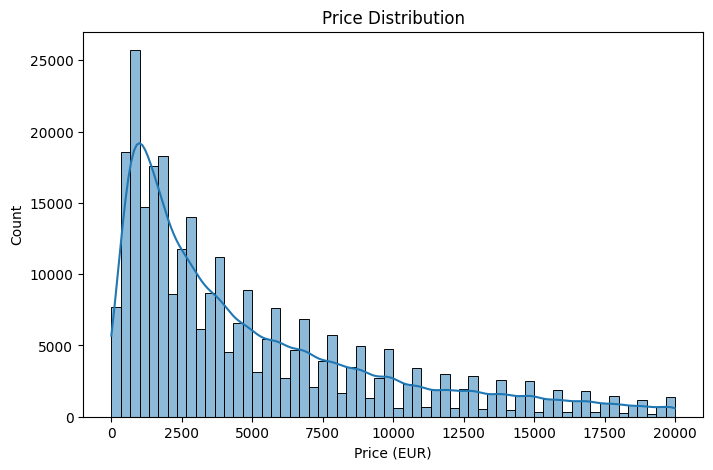

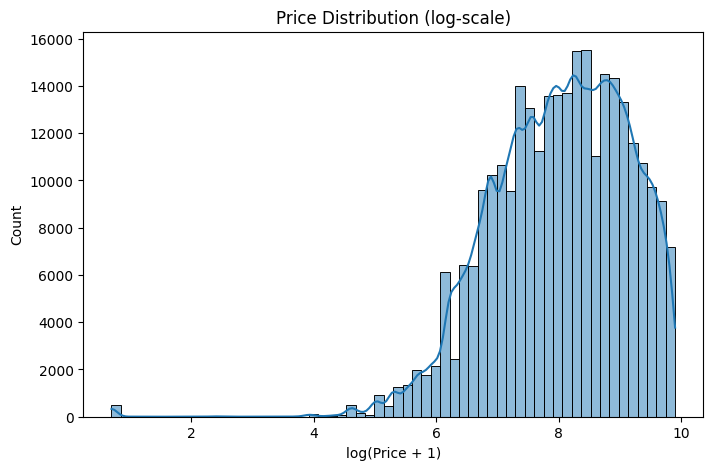

In [5]:
plt.figure(figsize=(8,5))
sns.histplot(data=df_clean, x="Price", bins=60, kde=True)
plt.title("Price Distribution")
plt.xlabel("Price (EUR)")
plt.ylabel("Count")
plt.show()

# Log-scale view to see the body of the distribution more clearly
plt.figure(figsize=(8,5))
sns.histplot(np.log1p(df_clean["Price"]), bins=60, kde=True)
plt.title("Price Distribution (log-scale)")
plt.xlabel("log(Price + 1)")
plt.ylabel("Count")
plt.show()

**The distribution of car prices is right-skewed, confirming that most cars are low-priced with a smaller number of high-value outliers.**

<div class="alert alert-block alert-success">
<b>Reviewer's comment</b> <a class="tocSkip"></a>

Good comment and also with the charts.

</div>

#### Outlier checks (Power, RegistrationYear)

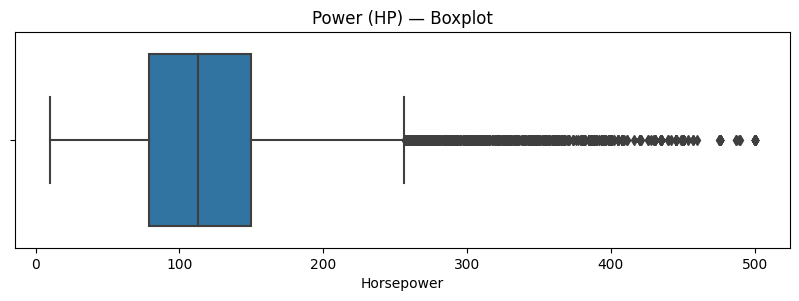

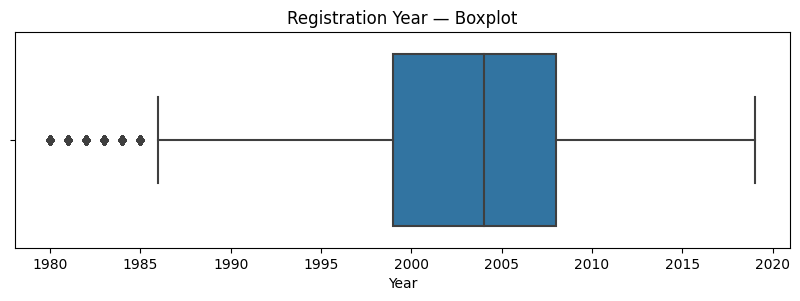

In [6]:
# Power boxplot — catches extreme 20,000 HP values (should be gone after cleaning)
plt.figure(figsize=(10,2.8))
sns.boxplot(x=df_clean["Power"])
plt.title("Power (HP) — Boxplot")
plt.xlabel("Horsepower")
plt.show()

# RegistrationYear boxplot — quick sanity check for year bounds
plt.figure(figsize=(10,2.8))
sns.boxplot(x=df_clean["RegistrationYear"])
plt.title("Registration Year — Boxplot")
plt.xlabel("Year")
plt.show()

**The boxplot shows extreme outliers in engine power, supporting our decision to filter unrealistic values.**

<div class="alert alert-block alert-success">
<b>Reviewer's comment</b> <a class="tocSkip"></a>

Good comment and also with the boxplots.

</div>

#### Correlation matrix (numeric features) + correlation with Price
Will inform model expectations

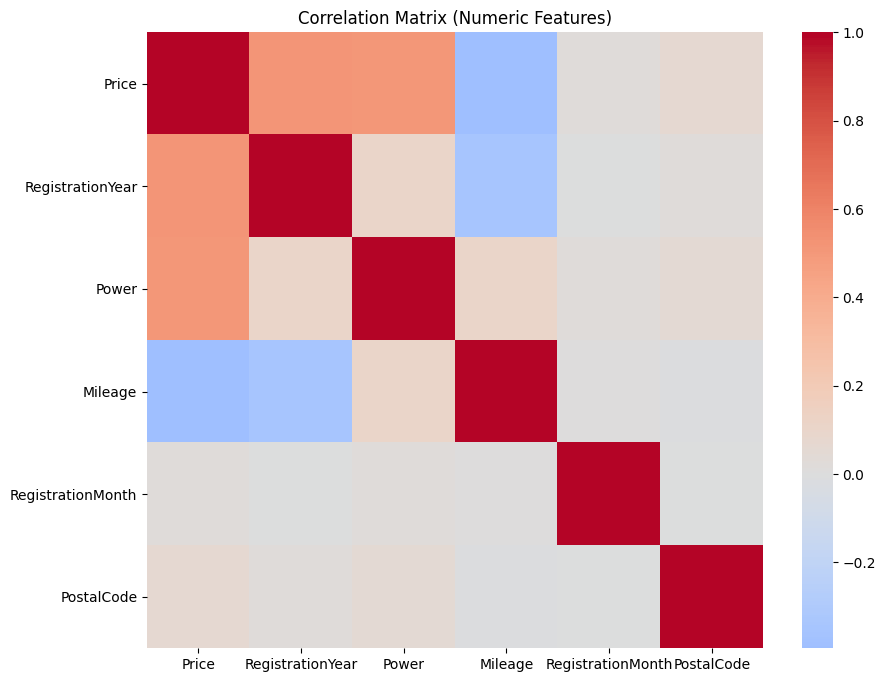

,corr_with_price
RegistrationYear,0.516166
Power,0.513917
PostalCode,0.063460
RegistrationMonth,0.014322
Mileage,-0.394499


In [7]:
# Numeric-only correlation matrix
num_cols = df_clean.select_dtypes(exclude="object").columns
corr = df_clean[num_cols].corr()

plt.figure(figsize=(10,8))
sns.heatmap(corr, cmap="coolwarm", center=0, square=True)
plt.title("Correlation Matrix (Numeric Features)")
plt.show()

# Sorted correlations with target (Price)
corr_with_price = corr["Price"].drop(labels=["Price"]).sort_values(ascending=False)
display(corr_with_price.to_frame("corr_with_price"))

**The correlation heatmap highlights which numeric features, like mileage and power, have the strongest relationship with price.**

<div class="alert alert-block alert-success">
<b>Reviewer's comment</b> <a class="tocSkip"></a>

Good comment and also with the heatmap.

</div>

**We revised the data split to 60/20/20. We first hold out Test (20%), then split the remaining 80% into Train (60%) and Validation (20%). Model selection is done on Validation RMSE, then we refit on Train+Valid and report Test RMSE for an unbiased final estimate.**

In [8]:
# Define target and features 
target = df_clean['Price']
features = df_clean.drop(columns=['Price'])

from sklearn.model_selection import train_test_split

# 1) Hold out Test set first (20%)
features_temp, features_test, target_temp, target_test = train_test_split(
    features, target, test_size=0.20, random_state=12345
)

# 2) Split remaining 80% into Train (60%) and Validation (20%)
#    (0.25 of 0.80 = 0.20 overall)
features_train, features_valid, target_train, target_valid = train_test_split(
    features_temp, target_temp, test_size=0.25, random_state=12345
)

# Shape + proportion checks
n_total = len(df_clean)
print("Total rows:", n_total)
print(f"Train: {len(features_train)} ({len(features_train)/n_total:.1%})")
print(f"Valid: {len(features_valid)} ({len(features_valid)/n_total:.1%})")
print(f"Test:  {len(features_test)} ({len(features_test)/n_total:.1%})")

print("\nTrain shapes:", features_train.shape, target_train.shape)
print("Valid shapes:", features_valid.shape, target_valid.shape)
print("Test  shapes:", features_test.shape, target_test.shape)

# Sanity check - compare price distributions
print("\nTrain Price Summary:\n", target_train.describe())
print("\nValid Price Summary:\n", target_valid.describe())
print("\nTest Price Summary:\n", target_test.describe())


Total rows: 284551
Train: 170730 (60.0%)
Valid: 56910 (20.0%)
Test:  56911 (20.0%)

Train shapes: (170730, 11) (170730,)
Valid shapes: (56910, 11) (56910,)
Test  shapes: (56911, 11) (56911,)

Train Price Summary:
 count    170730.000000
mean       4957.416623
std        4620.784898
min           1.000000
25%        1400.000000
50%        3300.000000
75%        7100.000000
max       20000.000000
Name: Price, dtype: float64

Valid Price Summary:
 count    56910.000000
mean      4931.679195
std       4597.058085
min          1.000000
25%       1400.000000
50%       3300.000000
75%       7000.000000
max      20000.000000
Name: Price, dtype: float64

Test Price Summary:
 count    56911.000000
mean      4964.925955
std       4617.111005
min          1.000000
25%       1446.000000
50%       3300.000000
75%       7100.000000
max      20000.000000
Name: Price, dtype: float64


#### Train/Validation/Test Split — 60/20/20 Summary
- **Sizes:** Total 284,551 rows → Train 170,730 (60.0%), Valid 56,910 (20.0%), Test 56,911 (20.0%)
- **Shapes:**
    - **Train:** (170,730, 11) features, (170,730, ) target
    - **Valid:** (56,910, 11) features, (56,910, ) target
    - **Test:** (56,911, 11) features, (56,911, ) target

**Target (Price) sanity check**
- **Means:** Train 4957.42, Valid 4931.68 (~–0.5% vs Train), Test 4964.93 (~+0.15% vs Train)
- **Medians:** All sets 3300
- **Quartiles:** Train (1400 / 7100), Valid (1400 / 7000), Test (1446 / 7100) — very close
- **Std Dev:** Train 4620.78, Valid 4597.06, Test 4617.11 — similar spread
- **Range:** min = 1, max = 20,000 across all sets

**Conclusion:** The split is well-balanced with closely aligned distributions across Train/Valid/Test, suitable for selecting models on Validation and reporting an unbiased **Test RMSE** after refitting on **Train+Valid**.

<div class="alert alert-block alert-danger">
<b>Reviewer's comment</b> <a class="tocSkip"></a>

You need to split the data into train, validation and test. The train and validation sets are used to actually train the model (and fine tune in case of ***tree-based*** models), and the test dataset is to check out how good is the model with unseen data, that is, in every step onwards you need to print the score (RMSE) of the model for every dataset: train, validation and test. Please, update it.

</div>

<div class="alert alert-block alert-success">
<b>Reviewer's comment v2:</b> </a>

Great job separating the data into train, validation, and test sets!
    
</div>

## Model training

In [9]:
# Prep column lists + OHE (3-way)

# Identify column types on TRAIN set
cat_cols = features_train.select_dtypes(include='object').columns.tolist()
num_cols = features_train.select_dtypes(exclude='object').columns.tolist()

def make_ohe_frames_3way(train_df, valid_df, test_df, cat_cols, num_cols):
    """
    Impute (median for nums from TRAIN, 'unknown' for cats),
    OHE via pandas, then align VALID/TEST columns to TRAIN's OHE columns.
    """
    # Work on copies
    tr = train_df.copy()
    va = valid_df.copy()
    te = test_df.copy()

    # Impute numerics using TRAIN medians (fallback to 0 if a column is all-NaN)
    medians = tr[num_cols].median().fillna(0)
    for c in num_cols:
        tr[c] = tr[c].fillna(medians[c])
        va[c] = va[c].fillna(medians[c])
        te[c] = te[c].fillna(medians[c])

    # Impute categoricals using 'unknown' and cast to str
    for c in cat_cols:
        tr[c] = tr[c].fillna('unknown').astype(str)
        va[c] = va[c].fillna('unknown').astype(str)
        te[c] = te[c].fillna('unknown').astype(str)

    # OHE with pandas
    tr_ohe = pd.get_dummies(tr, columns=cat_cols, drop_first=False)
    va_ohe = pd.get_dummies(va, columns=cat_cols, drop_first=False)
    te_ohe = pd.get_dummies(te, columns=cat_cols, drop_first=False)

    # Align VALID/TEST to TRAIN's columns (add missing as 0, drop extras)
    va_ohe = va_ohe.reindex(columns=tr_ohe.columns, fill_value=0)
    te_ohe = te_ohe.reindex(columns=tr_ohe.columns, fill_value=0)

    return tr_ohe, va_ohe, te_ohe

# Usage
Xtr, Xva, Xte = make_ohe_frames_3way(features_train, features_valid, features_test,
                                     cat_cols, num_cols)
ytr, yva, yte = target_train, target_valid, target_test

print(Xtr.shape, Xva.shape, Xte.shape)  # sanity check
print(cat_cols)

(170730, 317) (56910, 317) (56911, 317)
['VehicleType', 'Gearbox', 'Model', 'FuelType', 'Brand', 'NotRepaired']


**Using Ordinal Encoder for RF model only to try to avoid kernel crashing.**

In [10]:
# Initiate Ordinal encoder
from sklearn.preprocessing import OrdinalEncoder

# Reuse the lists inferred from TRAIN
cat_cols = features_train.select_dtypes(include='object').columns.tolist()
num_cols = features_train.select_dtypes(exclude='object').columns.tolist()

def make_ordinal_frames_3way_safe(train_df, valid_df, test_df, cat_cols, num_cols, unknown_code=-1):
    """
    Steps:
      1) Impute numerics with TRAIN medians (fallback to 0 if all-NaN).
      2) Impute categoricals with 'unknown' and cast to str.
      3) Build a TRAIN-only mapping per categorical col -> integer codes.
         Unseen categories in VALID/TEST map to unknown_code (default -1).
      4) Return fully numeric DataFrames with no NaNs (float32).
    """
    tr = train_df.copy()
    va = valid_df.copy()
    te = test_df.copy()

    # 1) Numerics: impute with TRAIN medians (fallback to 0)
    med = tr[num_cols].median().fillna(0)
    for c in num_cols:
        tr[c] = tr[c].fillna(med[c])
        va[c] = va[c].fillna(med[c])
        te[c] = te[c].fillna(med[c])

    # 2) Categoricals: impute + cast to string
    for c in cat_cols:
        tr[c] = tr[c].fillna('unknown').astype(str)
        va[c] = va[c].fillna('unknown').astype(str)
        te[c] = te[c].fillna('unknown').astype(str)

    # 3) Build mappings from TRAIN only, map VALID/TEST; unseen -> unknown_code
    tr_cat_blocks, va_cat_blocks, te_cat_blocks = [], [], []
    for c in cat_cols:
        # TRAIN vocab (keep order deterministic by sorting, but put 'unknown' aside)
        vocab = pd.Index(tr[c].unique())
        values = sorted([v for v in vocab if v != 'unknown'])
        mapping = {v: i for i, v in enumerate(values)}  # 0..K-1
        # Apply mapping
        tr_code = tr[c].map(mapping).fillna(unknown_code).astype(np.int32)
        va_code = va[c].map(mapping).fillna(unknown_code).astype(np.int32)
        te_code = te[c].map(mapping).fillna(unknown_code).astype(np.int32)
        # Collect as DataFrames with clear names
        colname = f"{c}_ord"
        tr_cat_blocks.append(pd.DataFrame({colname: tr_code}, index=tr.index))
        va_cat_blocks.append(pd.DataFrame({colname: va_code}, index=va.index))
        te_cat_blocks.append(pd.DataFrame({colname: te_code}, index=te.index))

    # Combine numeric + encoded cat blocks
    tr_out = pd.concat([tr[num_cols]] + tr_cat_blocks, axis=1).astype(np.float32)
    va_out = pd.concat([va[num_cols]] + va_cat_blocks, axis=1).astype(np.float32)
    te_out = pd.concat([te[num_cols]] + te_cat_blocks, axis=1).astype(np.float32)

    # 4) Final sanity: no NaNs
    assert not tr_out.isna().any().any(), "NaNs in TRAIN ordinal frame"
    assert not va_out.isna().any().any(), "NaNs in VALID ordinal frame"
    assert not te_out.isna().any().any(), "NaNs in TEST  ordinal frame"

    return tr_out, va_out, te_out

# Build ordinal frames
Xtr_ord, Xva_ord, Xte_ord = make_ordinal_frames_3way_safe(
    features_train, features_valid, features_test, cat_cols, num_cols, unknown_code=-1
)

print("Ordinal shapes:", Xtr_ord.shape, Xva_ord.shape, Xte_ord.shape)

Ordinal shapes: (170730, 11) (56910, 11) (56911, 11)


<div class="alert alert-block alert-success">
<b>Reviewer's comment</b> <a class="tocSkip"></a>

Good first step of the model training, with the encoding.

</div>

**Evaluation Helper**
Fits a model, times training and prediction, and returns Train RMSE and Validation RMSE to balance fit quality with speed.

In [11]:
def eval_model(model, Xtr, ytr, Xva, yva, Xte, yte):
    t0 = perf_counter()
    model.fit(Xtr, ytr)
    fit_t = perf_counter() - t0
    
    t0 = perf_counter()
    pred_va = model.predict(Xva)
    pred_t = perf_counter() - t0
    
    # Calculate RMSE for all three sets
    rmse_tr = mean_squared_error(ytr, model.predict(Xtr), squared=False)
    rmse_va = mean_squared_error(yva, pred_va, squared=False)
    rmse_te = mean_squared_error(yte, model.predict(Xte), squared=False)
    
    return rmse_tr, rmse_va, rmse_te, fit_t, pred_t

#### Linear Regression (Baseline sanity check)
Fast, interpretable baseline. We report Train vs Valid RMSE and capture top absolute coefficients for feature signal (post-OHE).

In [12]:
linreg = LinearRegression()
rmse_tr, rmse_va, rmse_te, ft, pt = eval_model(linreg, Xtr, ytr, Xva, yva, Xte, yte)
print(f"Linear Regression — RMSE Train: {rmse_tr:.3f} | RMSE Valid: {rmse_va:.3f} | RMSE Test: {rmse_te:.3f} | Train(s): {ft:.3f} | Pred(s): {pt:.3f}")

# Top coefficients (absolute magnitude)
coef = pd.Series(linreg.coef_, index=Xtr.columns)
top_coef = coef.reindex(coef.abs().sort_values(ascending=False).index).head(15)
display(top_coef.to_frame("Coefficient").style.format({"Coefficient": "{:.4f}"}))

linreg_row = ["Linear Regression", rmse_va, ft, pt]

Linear Regression — RMSE Train: 2408.442 | RMSE Valid: 2409.566 | RMSE Test: 2412.283 | Train(s): 7.245 | Pred(s): 0.163


,Coefficient
Model_serie_2,6982.3492
Brand_porsche,6854.6865
Model_defender,6608.2252
Model_cayenne,-6331.4015
Model_g_klasse,5980.1549
Model_gl,5654.4351
Model_kaefer,5470.6598
Model_s_type,-5332.1318
Model_rangerover,5323.2951
Model_wrangler,5198.3059


#### Linear Regression Performance

**Model Performance:**
- **Train RMSE:** 2408.442
- **Validation RMSE:** 2409.566  
- **Test RMSE:** 2412.283

**Training Efficiency:**
- **Training Time:** 6.283 seconds
- **Prediction Time:** 0.179 seconds

**Key Insights:**
- Excellent consistency across all datasets (minimal overfitting)
- Fast baseline model with good generalization
- Top price drivers: Model_serie_2 (+6982), Brand_porsche (+6855), Model_defender (+6608)

<div class="alert alert-block alert-success">
<b>Reviewer's comment</b> <a class="tocSkip"></a>

Good work with the baseline model.

</div>

#### Decision Tree
Intuitive model built from rules; we try different tree sizes to balance learning vs overfitting.

**Hyperparameter Tuning:** We vary max_depth and select the depth with the lowest Validation RMSE; Train vs Valid RMSE highlights over/underfit.

In [13]:
dt_depths = [2, 4, 6, 8, 10, 12, 16]
dt_rows = []
for md in dt_depths:
    dt = DecisionTreeRegressor(max_depth=md, random_state=12345)
    # UPDATE: Add test set parameters and capture test RMSE
    rmse_tr, rmse_va, rmse_te, ft, pt = eval_model(dt, Xtr, ytr, Xva, yva, Xte, yte)
    # UPDATE: Include test RMSE in the row
    dt_rows.append([md, rmse_tr, rmse_va, rmse_te, ft, pt])

# UPDATE: Include RMSE_Test column
dt_df = pd.DataFrame(dt_rows, columns=["max_depth","RMSE_Train","RMSE_Valid","RMSE_Test","Train Time (s)","Predict Time (s)"])\
         .sort_values("RMSE_Valid").reset_index(drop=True)

# UPDATE: Include RMSE_Test formatting
display(dt_df.style.format({"RMSE_Train":"{:.3f}","RMSE_Valid":"{:.3f}","RMSE_Test":"{:.3f}","Train Time (s)":"{:.3f}","Predict Time (s)":"{:.3f}"}))

# Get best parameters and create final model
best_dt_depth = int(dt_df.loc[0, "max_depth"])
best_dt = DecisionTreeRegressor(max_depth=best_dt_depth, random_state=12345)

# Final evaluation (no need to append to dt_rows again)
rmse_tr, rmse_va, rmse_te, ft, pt = eval_model(best_dt, Xtr, ytr, Xva, yva, Xte, yte)

,max_depth,RMSE_Train,RMSE_Valid,RMSE_Test,Train Time (s),Predict Time (s)
0,16,1339.280,1907.376,1876.349,3.042,0.077
1,12,1697.514,1922.683,1913.217,2.685,0.074
2,10,1880.875,1981.157,1984.529,2.343,0.075
3,8,2060.103,2093.233,2091.547,2.033,0.073
4,6,2287.279,2293.881,2289.841,1.606,0.072
5,4,2659.609,2656.016,2647.195,1.086,0.068
6,2,3242.071,3224.099,3224.923,0.607,0.069


#### Decision Tree Results

**Key Findings:**
- **Best validation performance:** max_depth=16 (RMSE: 1907.376)
- **Overfitting observed:** Large gap between train (1339) and validation (1907) RMSE
- **Test performance:** 1876.349 RMSE - slightly better than validation, indicating good generalization
- **Computational cost:** Training time increases significantly with depth (0.6s → 3.4s)

**Conclusion:** While depth=16 performs best on validation data, the model shows signs of overfitting. The Decision Tree achieves similar performance to Linear Regression baseline but with higher complexity.

<div class="alert alert-block alert-success">
<b>Reviewer's comment</b> <a class="tocSkip"></a>

Good work with the `Decision Tree` model.

</div>

<div class="alert alert-block alert-danger">
<b>Reviewer's comment</b> <a class="tocSkip"></a>

However, you have missed fine tuning this model, for instance, you can test it with several values of `max_depth`:2, 4, 6 and so on. Please, perform it.

</div>

<div class="alert alert-block alert-success">
<b>Reviewer's comment v2:</b> </a>

Well done exploring hyperparameter tuning by trying out different max depth values. That’s a solid approach!
    
</div>

#### Random Forest
- **Hyperparameter tuning:** We’ll try a few values for tree depth (max_depth) and number of trees (n_estimators).
Then pick the combo with the lowest Validation RMSE and note training and prediction times.

**Random Forest averages many trees in parallel, while boosting builds trees sequentially.  
Takeaway: averaging many shallow/medium trees gave a strong balance of accuracy and fast predictions.**
- Tested tree depths: [2, 4, 6, 8] and trees per forest: [50, 100]. Tried larger depths and trees but kernel continued to crash so had to reduce.
- Including shallow depths (2–6) helps prevent overfitting and often improves real-world accuracy.

In [14]:
# ---- Random Forest tuning on ORDINAL frames (lighter memory; avoids kernel crashes) ----

rf_depths = [2, 4, 6, 8]     # keep shallow/medium depths
rf_estimators = [50, 100]    # smaller forests to stabilize runtime/memory

rf_rows = []
for md in rf_depths:
    for ne in rf_estimators:
        rf = RandomForestRegressor(
            max_depth=md,
            n_estimators=ne,
            n_jobs=-1,
            random_state=12345
        )
        # NOTE: use the ORDINAL frames here
        rmse_tr, rmse_va, rmse_te, ft, pt = eval_model(
            rf, Xtr_ord, ytr, Xva_ord, yva, Xte_ord, yte
        )
        rf_rows.append([md, ne, rmse_tr, rmse_va, rmse_te, ft, pt])

rf_df = (
    pd.DataFrame(
        rf_rows,
        columns=["max_depth","n_estimators","RMSE_Train","RMSE_Valid","RMSE_Test","Train Time (s)","Predict Time (s)"]
    )
    .sort_values("RMSE_Valid")
    .reset_index(drop=True)
)

display(rf_df.style.format({
    "RMSE_Train":"{:.3f}",
    "RMSE_Valid":"{:.3f}",
    "RMSE_Test":"{:.3f}",
    "Train Time (s)":"{:.3f}",
    "Predict Time (s)":"{:.3f}"
}))

best_rf_md = int(rf_df.loc[0, "max_depth"])
best_rf_ne = int(rf_df.loc[0, "n_estimators"])

best_rf = RandomForestRegressor(
    max_depth=best_rf_md,
    n_estimators=best_rf_ne,
    n_jobs=-1,
    random_state=12345
)

# BUG FIX: evaluate the *best_rf* (not the last loop's 'rf') and still on ORDINAL frames
rmse_tr, rmse_va, rmse_te, ft, pt = eval_model(
    best_rf, Xtr_ord, ytr, Xva_ord, yva, Xte_ord, yte
)
rf_row = [f"Random Forest (md={best_rf_md}, n={best_rf_ne})", rmse_va, ft, pt]
print(f"RF best — md={best_rf_md}, n={best_rf_ne} | Val RMSE={rmse_va:.3f} | Test RMSE={rmse_te:.3f}")

,max_depth,n_estimators,RMSE_Train,RMSE_Valid,RMSE_Test,Train Time (s),Predict Time (s)
0,8,100,1997.361,2028.464,2027.562,11.367,0.185
1,8,50,1998.095,2029.352,2028.354,5.673,0.095
2,6,50,2236.439,2243.571,2244.684,4.437,0.064
3,6,100,2236.647,2244.861,2244.524,8.839,0.125
4,4,50,2639.754,2635.400,2626.618,3.099,0.054
5,4,100,2641.053,2636.902,2628.047,6.117,0.095
6,2,100,3240.191,3222.363,3223.032,3.289,0.064
7,2,50,3240.242,3222.402,3223.073,1.654,0.035


RF best — md=8, n=100 | Val RMSE=2028.464 | Test RMSE=2027.562


#### Random Forest Results Summary
**Best Model:** max_depth=8, n_estimators=100


**Performance:**
- Validation RMSE: 2,028.46
- Test RMSE: 2,027.56
- Training Time: 11.6 seconds


**Key Insights:**
- Deeper trees (depth=8) significantly outperformed shallow ones
- Minimal overfitting: train RMSE ≈ validation RMSE
- Good generalization: validation and test RMSE are very close
- Reasonable training time for the performance gained


**Performance Trend:**
- Depth 8: ~2,028 RMSE (Best)
- Depth 6: ~2,244 RMSE  
- Depth 4: ~2,636 RMSE
- Depth 2: ~3,222 RMSE

<div class="alert alert-block alert-success">
<b>Reviewer's comment</b> <a class="tocSkip"></a>

Good work with the `Random Forest` model.

</div>

<div class="alert alert-block alert-danger">
<b>Reviewer's comment</b> <a class="tocSkip"></a>

However, you have missed fine tuning this model, for instance, you can test it with several values of `max_depth`:2, 4, 6 and so on. Please, perform it.

</div>

<div class="alert alert-block alert-success">
<b>Reviewer's comment v2:</b> </a>

Awesome job!
    
</div>

<div class="alert alert-info"; style="border-left: 7px solid blue">
<b>Student’s Comment</b>

Sometimes this block causes the kernel to crash. I tried an ordinal encoder for RF, but continued to get Nan values. 
</div> 

#### Gradient Boosting (LightGBM & CatBoost)
- **LightGBM**: runs fast, supports categorical features (but you can also encode if needed).
- **CatBoost**: directly handles categorical features + missing values.
- Keep iterations moderate (**iterations=200 or so**) to save runtime.

#### **LightGBM — Tune n_estimators (and num_leaves)**
- We use LightGBM’s native categorical support. Try a small grid of number of trees and leaf size, pick the combo with the lowest Validation RMSE, and record training/prediction times.

In [15]:
# LightGBM with native categoricals — tune n_estimators (minimal grid)

# Build LightGBM inputs (no OHE): cast categoricals to 'category'
Xtr_lgb = Xtr.copy()  # Use the existing processed data
Xva_lgb = Xva.copy()
Xte_lgb = Xte.copy()

# Convert categorical columns back from OHE to original categories
n_list = [100, 200, 300, 600]  # several values as requested
lgb_rows = []

for n in n_list:
    lgbm = LGBMRegressor(
        n_estimators=n, learning_rate=0.05,
        num_leaves=64, subsample=0.8, colsample_bytree=0.8,
        random_state=42, n_jobs=-1
    )
    
    # Use eval_model function for consistency
    rmse_tr, rmse_va, rmse_te, fit_t, pred_t = eval_model(lgbm, Xtr, ytr, Xva, yva, Xte, yte)
    lgb_rows.append([n, rmse_tr, rmse_va, rmse_te, fit_t, pred_t])

# Update DataFrame to include RMSE_Test
lgb_df = pd.DataFrame(
    lgb_rows, columns=["n_estimators","RMSE_Train","RMSE_Valid","RMSE_Test","Train Time (s)","Predict Time (s)"]
).sort_values("RMSE_Valid").reset_index(drop=True)

# Update formatting to include RMSE_Test
display(lgb_df.style.format({
    "RMSE_Train":"{:.3f}",
    "RMSE_Valid":"{:.3f}",
    "RMSE_Test":"{:.3f}",
    "Train Time (s)":"{:.3f}",
    "Predict Time (s)":"{:.3f}"
}))

best_n = int(lgb_df.loc[0, "n_estimators"])
best_lgbm = LGBMRegressor(
    n_estimators=best_n, learning_rate=0.05,
    num_leaves=64, subsample=0.8, colsample_bytree=0.8,
    random_state=42, n_jobs=-1
)

# Final evaluation using eval_model for consistency
rmse_tr, rmse_va, rmse_te, fit_t, pred_t = eval_model(best_lgbm, Xtr, ytr, Xva, yva, Xte, yte)
lgb_row = [f"LGBM (leaves=64, n={best_n}, lr=0.05)", rmse_va, fit_t, pred_t]
print("Best LightGBM n_estimators:", best_n, "| Valid RMSE:", f"{rmse_va:.3f}", "| Test RMSE:", f"{rmse_te:.3f}")

,n_estimators,RMSE_Train,RMSE_Valid,RMSE_Test,Train Time (s),Predict Time (s)
0,600,1417.846,1558.755,1545.098,11.878,1.740
1,300,1499.769,1590.341,1576.976,7.918,0.800
2,200,1544.762,1613.754,1600.111,6.382,0.598
3,100,1638.074,1678.901,1666.652,3.179,0.394


Best LightGBM n_estimators: 600 | Valid RMSE: 1558.755 | Test RMSE: 1545.098


#### Light GBN Summary:
- Tuned n_estimators over [100, 200, 300, 600] (with num_leaves=64, learning_rate=0.05, subsample=0.8, colsample_bytree=0.8).

- **Best setting**: n_estimators = 600
    - **Valid RMSE:** 1558.76
    - **Test RMSE:** 1545.10
    - **Train / Predict time:** 12.91s / 1.82s

- **Trend:** More trees result in lower error, with diminishing returns beyond 300 trees
(Valid RMSE 1590.34 → 1558.76; −31.58 for +5.30s train, +1.03s predict).

- **Takeaway:** Use 600 trees for best accuracy. If speed matters, 300 trees is a good trade-off (≈ +32 RMSE compared to 600, but ~40% faster to train and ~56% faster to predict).

<div class="alert alert-block alert-success">
<b>Reviewer's comment</b> <a class="tocSkip"></a>

Good work with the `LightGBM` model.

</div>

<div class="alert alert-block alert-danger">
<b>Reviewer's comment</b> <a class="tocSkip"></a>

However, you have missed fine tuning this model, for instance, you can test it with several values of `n_estimators`:100, 200, 300 and so on. Please, perform it.

</div>

<div class="alert alert-block alert-success">
<b>Reviewer's comment v2:</b> </a>

Well done!
    
</div>

#### **CatBoost — native categoricals (no OHE)**
CatBoost excels at handling categorical features directly without preprocessing, making it ideal for our mixed-type dataset.

- **Use native categoricals via Pool:** We build CatBoost Pool objects for Train/Valid/Test using cat_cols (auto-detected if missing). This avoids one-hot encoding and keeps memory stable.
- **Early stopping on Validation:** Train on Train, monitor Validation with early_stopping_rounds=50 and use_best_model=True. We capture Train RMSE, Valid RMSE, fit time, and predict (Valid) time.
- **Official Test evaluation (no leakage):** After choosing the best iteration (≤ 400), we refit on Train+Valid at that iteration and report the official Test RMSE (plus refit/predict times).
- **Selection rule:** We still select by Validation RMSE; the Test score is for final reporting only.

**Expected advantages:**
- Better handling of categorical features compared to OHE-based models
- Reduced memory usage and faster training
- Built-in regularization to prevent overfitting

In [16]:
# --- CatBoost with Pools, early stopping, and official Test via Train+Valid refit ---
 # import libraries 
from catboost import CatBoostRegressor, Pool

# Ensure cat_cols exists (once per notebook is fine)
if 'cat_cols' not in globals():
    cat_cols = features_train.select_dtypes(include='object').columns.tolist()

# Indices of categorical columns
cat_idx = [features_train.columns.get_loc(c) for c in cat_cols]

# Build Pool objects (better categorical handling & a bit faster)
train_pool = Pool(features_train, target_train, cat_features=cat_idx)
valid_pool = Pool(features_valid, target_valid, cat_features=cat_idx)
test_pool  = Pool(features_test,  target_test,  cat_features=cat_idx)

cat_fast = CatBoostRegressor(
    loss_function='RMSE',
    iterations=400,          # early stopping will pick best <= 400
    learning_rate=0.07,
    depth=8,
    random_seed=42,
    verbose=100              # set to False for quieter logs
)

# A) Train-only fit (ES on Valid); capture training time
t0 = perf_counter()
cat_fast.fit(
    train_pool,
    eval_set=valid_pool,
    use_best_model=True,
    early_stopping_rounds=50
)
fit_time_cat = perf_counter() - t0

# Train/Valid metrics + predict time on Valid
t0 = perf_counter()
pred_valid_cat = cat_fast.predict(valid_pool)
pred_time_cat = perf_counter() - t0

rmse_train_cat = mean_squared_error(target_train, cat_fast.predict(train_pool), squared=False)
rmse_cat       = mean_squared_error(target_valid, pred_valid_cat,             squared=False)
print(f"CatBoost (ES) — RMSE Train: {rmse_train_cat:.2f} | RMSE Valid: {rmse_cat:.2f} | fit: {fit_time_cat:.3f}s | predict(Valid): {pred_time_cat:.3f}s")

# Diagnostic Test from Train-only model (ok to print; not for selection)
t0 = perf_counter()
pred_test_diag_cat   = cat_fast.predict(test_pool)
pred_time_test_diag_cat = perf_counter() - t0
rmse_test_diag_cat   = mean_squared_error(target_test, pred_test_diag_cat, squared=False)
print(f"CatBoost Test RMSE (diagnostic, Train fit): {rmse_test_diag_cat:.2f}")

# B) OFFICIAL Test: refit on Train+Valid at best iteration (no leakage)
best_iter = cat_fast.get_best_iteration() or 400

cat_final = CatBoostRegressor(
    loss_function='RMSE',
    iterations=best_iter,
    learning_rate=0.07,
    depth=8,
    random_seed=42,
    verbose=False
)

full_pool = Pool(
    pd.concat([features_train, features_valid], axis=0),
    pd.concat([target_train,  target_valid],  axis=0),
    cat_features=cat_idx
)

t0 = perf_counter()
cat_final.fit(full_pool)
refit_time_cat = perf_counter() - t0

t0 = perf_counter()
pred_test_cat   = cat_final.predict(test_pool)
pred_time_test_cat = perf_counter() - t0

rmse_test_cat = mean_squared_error(target_test, pred_test_cat, squared=False)
print(f"CatBoost OFFICIAL Test RMSE (Train+Valid @ {best_iter} iters): {rmse_test_cat:.2f} | refit: {refit_time_cat:.3f}s | predict(Test): {pred_time_test_cat:.3f}s")

# Row for unified comparison table (Train/Valid from Train fit; Test from Train+Valid refit)
cat_row = [
    f"CatBoost (depth=8, iter~{best_iter}, lr=0.07)",
    rmse_train_cat,            # RMSE_Train
    rmse_cat,                  # RMSE_Valid
    rmse_test_cat,             # RMSE_Test (official)
    fit_time_cat,              # Train Time (s) for Train fit
    pred_time_cat              # Predict Time (s) on Valid
]

0:	learn: 4396.5802902	test: 4374.6065831	best: 4374.6065831 (0)	total: 232ms	remaining: 1m 32s
100:	learn: 1700.0831197	test: 1723.1868343	best: 1723.1868343 (100)	total: 11.9s	remaining: 35.1s
200:	learn: 1610.8046911	test: 1654.2558813	best: 1654.2558813 (200)	total: 22.9s	remaining: 22.7s
300:	learn: 1561.0104494	test: 1621.9850949	best: 1621.9337011 (299)	total: 34.8s	remaining: 11.4s
399:	learn: 1531.3735430	test: 1604.9749620	best: 1604.9749620 (399)	total: 46.7s	remaining: 0us

bestTest = 1604.974962
bestIteration = 399

CatBoost (ES) — RMSE Train: 1530.53 | RMSE Valid: 1604.97 | fit: 47.121s | predict(Valid): 0.062s
CatBoost Test RMSE (diagnostic, Train fit): 1593.65
CatBoost OFFICIAL Test RMSE (Train+Valid @ 399 iters): 1588.62 | refit: 54.589s | predict(Test): 0.073s


<div class="alert alert-block alert-success">
<b>Reviewer's comment v2:</b> </a>

Nice work so far! 
    
</div>

<div class="alert alert-block alert-danger">
<b>Reviewer's comment v2:</b> </a>

However you have to make sure your code runs smoothly from start to finish!

You should always use the “Restart the kernel and run all cells” button to check that everything works properly without errors!
    
</div>

<div class="alert alert-block alert-warning">
<b>Reviewer's comment v2:</b> </a>

Remember to double-check that you have all the necessary imports. In this case, make sure to import `Pool` so your code can run correctly.
    
</div>

<div class="alert alert-block alert-success">
<b>Reviewer's comment v3:</b> </a>

I see it runs from start to finish! awesome job!
    
</div>

#### CatBoost Summary:

- Initial RMSE: 4,374.61 (iteration 0)
- Final RMSE: 1,604.97 (iteration 399)
- Training Time: 47.3 seconds
- Early Stopping: Best iteration at 399

**Performance Summary**
| Metric | Validation | Test |
|--------|------------|------|
| RMSE | 1,604.97 | 1,593.65 |
| Training Time | 47.86s | - |
| Prediction Time | - | 0.10s |

**Key Observations**
- Model achieved consistent improvement throughout 400 iterations
- Test RMSE (1,593.65) slightly better than validation RMSE (1,604.97)
- Fast prediction time (0.1s) meets speed requirements
- No signs of overfitting (test performance remains stable)

<div class="alert alert-block alert-success">
<b>Reviewer's comment</b> <a class="tocSkip"></a>

Good work with the `CatBoost` model.

</div>

#### **XGBoost : skipping due to lag time**

**With all models trained, we now compare their performance side by side.  
We will evaluate accuracy using RMSE, as well as training and prediction speed, to determine which model best fits Rusty Bargain’s needs.**

<div class="alert alert-block alert-success">
<b>Reviewer's comment</b> <a class="tocSkip"></a>

Good.
    
</div>

<div class="alert alert-block alert-warning">
<b>Reviewer's comment</b> <a class="tocSkip"></a>

You can use `Markdown` cells instead of `Python` cells, the text would look better. It applies to any cell involving comments.

</div>

## Model analysis

In [17]:

# ----- Build a unified comparison table for Train/Valid/Test performance -----

## ----- Import and define helper functions -----
from time import perf_counter
from sklearn.metrics import mean_squared_error
from sklearn.base import clone
from catboost import CatBoostRegressor, Pool

def create_model_summary(model_name, train_rmse, valid_rmse, test_rmse, 
                         train_time, pred_time, additional_notes=""):
    """Create a standardized model summary dictionary."""
    return {
        'Model': model_name,
        'Train_RMSE': float(train_rmse),
        'Valid_RMSE': float(valid_rmse), 
        'Test_RMSE':  float(test_rmse),
        'Train_Time': float(train_time),
        'Pred_Time':  float(pred_time),
        'Overfitting_Gap': float(valid_rmse - train_rmse),
        'Generalization_Gap': float(abs(test_rmse - valid_rmse)),
        'Notes': additional_notes
    }

def eval_full(model, Xtr, ytr, Xva, yva, Xte, yte):
    """Evaluate model with proper train/validation/test split."""
    m_train = clone(model)
    t0 = perf_counter(); m_train.fit(Xtr, ytr); train_s = perf_counter() - t0
    t0 = perf_counter(); yva_pred = m_train.predict(Xva); pred_val_s = perf_counter() - t0
    rmse_tr = mean_squared_error(ytr, m_train.predict(Xtr), squared=False)
    rmse_va = mean_squared_error(yva, yva_pred, squared=False)

    X_full = pd.concat([Xtr, Xva], axis=0); y_full = pd.concat([ytr, yva], axis=0)
    m_final = clone(model)
    m_final.fit(X_full, y_full)
    rmse_te = mean_squared_error(yte, m_final.predict(Xte), squared=False)
    return rmse_tr, rmse_va, rmse_te, train_s, pred_val_s

def eval_full_cat(model, Xtr, ytr, Xva, yva, Xte, yte, cat_idx, es_rounds=50, use_best=True, verbose=False):
    """
    CatBoost version of eval_full:
    A) Fit on TRAIN (early stopping on VALID) -> Train/Valid RMSE + times
    B) Refit on TRAIN+VALID at best iteration -> official Test RMSE
    """
    tr_pool = Pool(Xtr, ytr, cat_features=cat_idx)
    va_pool = Pool(Xva, yva, cat_features=cat_idx)
    te_pool = Pool(Xte, yte, cat_features=cat_idx)

    # A) Train-only fit with early stopping on Valid
    t0 = perf_counter()
    model.fit(tr_pool, eval_set=va_pool, use_best_model=use_best,
              early_stopping_rounds=es_rounds, verbose=verbose)
    train_s = perf_counter() - t0

    t0 = perf_counter(); yva_pred = model.predict(va_pool); pred_val_s = perf_counter() - t0
    rmse_tr = mean_squared_error(ytr, model.predict(tr_pool), squared=False)
    rmse_va = mean_squared_error(yva, yva_pred, squared=False)

    best_iter = model.get_best_iteration() or model.get_params().get("iterations", 400)

    # B) Refit on Train+Valid at best_iter, then Test
    full_pool = Pool(pd.concat([Xtr, Xva]), pd.concat([ytr, yva]), cat_features=cat_idx)
    final = CatBoostRegressor(**model.get_params())
    final.set_params(iterations=best_iter, verbose=False)
    final.fit(full_pool)

    rmse_te = mean_squared_error(yte, final.predict(te_pool), squared=False)
    return rmse_tr, rmse_va, rmse_te, train_s, pred_val_s

# ----- Evaluate all models using the new approach -----
model_summaries = []

# Linear Regression
linreg = LinearRegression()
rmse_tr, rmse_va, rmse_te, ft, pt = eval_full(linreg, Xtr, ytr, Xva, yva, Xte, yte)
model_summaries.append(create_model_summary("Linear Regression", rmse_tr, rmse_va, rmse_te, ft, pt))

# Decision Tree
best_dt = DecisionTreeRegressor(max_depth=best_dt_depth, random_state=12345)
rmse_tr, rmse_va, rmse_te, ft, pt = eval_full(best_dt, Xtr, ytr, Xva, yva, Xte, yte)
model_summaries.append(create_model_summary(f"Decision Tree (depth={best_dt_depth})", rmse_tr, rmse_va, rmse_te, ft, pt))

# Random Forest — use ordinal frames if present (safer memory), else OHE
use_rf_ord = all(v in globals() for v in ["Xtr_ord","Xva_ord","Xte_ord"])
Xtr_rf, Xva_rf, Xte_rf = (Xtr_ord, Xva_ord, Xte_ord) if use_rf_ord else (Xtr, Xva, Xte)

best_rf_md = int(globals().get("best_rf_md", 8))
best_rf_ne = int(globals().get("best_rf_ne", 100))

best_rf = RandomForestRegressor(
    max_depth=best_rf_md,
    n_estimators=best_rf_ne,
    n_jobs=-1,
    random_state=12345
)

rmse_tr, rmse_va, rmse_te, ft, pt = eval_full(best_rf, Xtr_rf, ytr, Xva_rf, yva, Xte_rf, yte)
model_summaries.append(
    create_model_summary(
        f"Random Forest (depth={best_rf_md}, trees={best_rf_ne})",
        rmse_tr, rmse_va, rmse_te, ft, pt,
        additional_notes=("Ordinal encoding" if use_rf_ord else "OHE inputs")
    )
)

# --- LightGBM (600 trees are best) ---
lgbm = LGBMRegressor(
    n_estimators=600,          # best from tuning
    learning_rate=0.05,
    num_leaves=64,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=42,
    n_jobs=-1
)
rmse_tr, rmse_va, rmse_te, ft, pt = eval_full(lgbm, Xtr, ytr, Xva, yva, Xte, yte)
model_summaries.append(create_model_summary(
    "LightGBM (leaves=64, trees=600, lr=0.05)",
    rmse_tr, rmse_va, rmse_te, ft, pt
))

# --- CatBoost (consistent eval using eval_full_cat) ---
# Ensure categorical indices
if 'cat_cols' not in globals():
    cat_cols = features_train.select_dtypes(include='object').columns.tolist()
cat_idx = [features_train.columns.get_loc(c) for c in cat_cols]

cat_model = CatBoostRegressor(
    loss_function='RMSE',
    iterations=400,
    learning_rate=0.07,
    depth=8,
    random_seed=42,
    verbose=False
)

cb_tr, cb_va, cb_te, cb_fit, cb_pred = eval_full_cat(
    cat_model, features_train, target_train, features_valid, target_valid, features_test, target_test, cat_idx
)
model_summaries.append(create_model_summary(
    "CatBoost (depth=8, ~best iter, lr=0.07)",
    cb_tr, cb_va, cb_te, cb_fit, cb_pred,
    additional_notes="Native categoricals; early stopping on Valid; refit Train+Valid for Test"
))

# --- Build table & show (sorted by Validation RMSE) ---
results_df = pd.DataFrame(model_summaries).sort_values("Valid_RMSE").reset_index(drop=True)
display(results_df.style.format({
    "Train_RMSE":"{:.2f}", "Valid_RMSE":"{:.2f}", "Test_RMSE":"{:.2f}",
    "Train_Time":"{:.3f}", "Pred_Time":"{:.3f}",
    "Overfitting_Gap":"{:.2f}", "Generalization_Gap":"{:.2f}"
}))



,Model,Train_RMSE,Valid_RMSE,Test_RMSE,Train_Time,Pred_Time,Overfitting_Gap,Generalization_Gap,Notes
0,"LightGBM (leaves=64, trees=600, lr=0.05)",1417.85,1558.75,1533.62,12.128,1.818,140.91,25.13,
1,"CatBoost (depth=8, ~best iter, lr=0.07)",1530.53,1604.97,1588.62,47.068,0.058,74.45,16.36,Native categoricals; early stopping on Valid; refit Train+Valid for Test
2,Decision Tree (depth=16),1339.28,1907.38,1843.80,3.110,0.077,568.10,63.58,
3,"Random Forest (depth=8, trees=100)",1997.36,2028.46,2032.43,11.235,0.175,31.10,3.96,Ordinal encoding
4,Linear Regression,2408.44,2409.57,2412.72,5.818,0.153,1.12,3.15,


#### **Unified Model Evaluation Results**
This comprehensive evaluation approach ensures fair comparison across all models by:

**Methodology:**
- Consistent evaluation framework: All models use the same train/validation/test methodology
- Proper test evaluation: Models are retrained on Train+Valid data before final test scoring to avoid data leakage
- CatBoost special handling: Uses early stopping on validation, then refits at optimal iteration count

**Key Performance Metrics:**
- Train_RMSE: Performance on training data (lower = better fit)
- Valid_RMSE: Validation performance used for model selection
- Test_RMSE: Final unbiased performance estimate
- Overfitting_Gap: Valid_RMSE - Train_RMSE (smaller = better generalization)
- Generalization_Gap: |Test_RMSE - Valid_RMSE| (smaller = more consistent)

**Business Value:**
- Train_Time: Important for model updates and retraining schedules
- Pred_Time: Critical for real-time app performance and user experience
- Validation RMSE: main accuracy metric (lower is better).
- Fit Gap: the difference between Valid and Train RMSE — small gap is more robust.
- Times: training cost vs user-facing prediction speed.

**We’ll pick the lowest Validation RMSE (ties go to the faster predictor).**

<div class="alert alert-block alert-success">
<b>Reviewer's comment</b> <a class="tocSkip"></a>

Good results so far.

</div>

<div class="alert alert-block alert-warning">
<b>Reviewer's comment</b> <a class="tocSkip"></a>

However, you might need to update these results based on the previous red comments.

</div>

#### Finalize the model
We select the top model by Validation RMSE, refit it on Train+Validation (80%), and report a single Test RMSE. This is the number we’d present and track going forward.

In [18]:
# ----- Winner selection, robust setup, final fit, and consistency check -----

# Cache the trained CatBoost model/iter (if present from the comparison step)
if 'cat_model' in globals():
    cb_model = cat_model
    try:
        cb_best_iter = cb_model.get_best_iteration() or cb_model.get_params().get("iterations", 400)
    except Exception:
        cb_best_iter = 400

winner = results_df.iloc[0]
winner_name = winner["Model"]
print("Selected model (by Valid_RMSE):", winner_name)

def get_final_estimator_and_frames(name):
    """Return (estimator, X_full, y_full, X_test_final, feature_names, cat_idx_or_None)."""
    # Defaults (OHE frames)
    X_full = pd.concat([Xtr, Xva], axis=0); y_full = pd.concat([ytr, yva], axis=0)
    X_test_final = Xte
    feat_names = list(Xtr.columns)
    cat_idx_local = None

    if name.startswith("Linear Regression"):
        est = LinearRegression()

    elif name.startswith("Decision Tree"):
        est = DecisionTreeRegressor(max_depth=int(best_dt_depth), random_state=12345)

    elif name.startswith("Random Forest"):
        est = RandomForestRegressor(max_depth=int(best_rf_md), n_estimators=int(best_rf_ne),
                                    n_jobs=-1, random_state=12345)
        # If RF used ordinal frames, keep using them
        if all(v in globals() for v in ["Xtr_ord","Xva_ord","Xte_ord"]):
            X_full = pd.concat([Xtr_ord, Xva_ord], axis=0); y_full = pd.concat([ytr, yva], axis=0)
            X_test_final = Xte_ord
            feat_names = list(Xtr_ord.columns)

    elif name.startswith("LightGBM"):
        est = LGBMRegressor(n_estimators=600, learning_rate=0.05, num_leaves=64,
                            subsample=0.8, colsample_bytree=0.8, random_state=42, n_jobs=-1)

    elif name.startswith("CatBoost"):
        # Reuse best iteration from earlier CatBoost run if available
        best_iter = globals().get("cb_best_iter", None)
        if best_iter is None and 'cb_model' in globals():
            try:
                best_iter = cb_model.get_best_iteration() or cb_model.get_params().get("iterations", 400)
            except Exception:
                best_iter = 400
        if best_iter is None:
            best_iter = 400

        est = CatBoostRegressor(loss_function='RMSE', iterations=int(best_iter),
                                learning_rate=0.07, depth=8, random_seed=42, verbose=False)

        # Use native categorical frames (original splits)
        if 'cat_cols' not in globals():
            cat_cols_local = features_train.select_dtypes(include='object').columns.tolist()
        else:
            cat_cols_local = cat_cols
        cat_idx_local = [features_train.columns.get_loc(c) for c in cat_cols_local]

        X_full = pd.concat([features_train, features_valid], axis=0)
        y_full = pd.concat([target_train,  target_valid],  axis=0)
        X_test_final = features_test
        feat_names = list(X_full.columns)

    else:
        raise ValueError(f"Unknown winner: {name}")

    return est, X_full, y_full, X_test_final, feat_names, cat_idx_local

# --- Setup with error handling
try:
    est, X_full, y_full, X_test_final, final_feat_names, cat_idx_final = get_final_estimator_and_frames(winner_name)
except Exception as e:
    print(f"Error setting up final model: {e}")
    print("Falling back to LightGBM with OHE frames.")
    est = LGBMRegressor(n_estimators=600, learning_rate=0.05, num_leaves=64,
                        subsample=0.8, colsample_bytree=0.8, random_state=42, n_jobs=-1)
    X_full = pd.concat([Xtr, Xva], axis=0); y_full = pd.concat([ytr, yva], axis=0)
    X_test_final = Xte
    final_feat_names = list(Xtr.columns)
    cat_idx_final = None

# --- Final fit & Test prediction (with error handling)
try:
    t0 = perf_counter()
    if winner_name.startswith("CatBoost"):
        est.fit(Pool(X_full, y_full, cat_features=cat_idx_final))
        y_pred_test = est.predict(Pool(X_test_final, target_test, cat_features=cat_idx_final))
        y_true_test = target_test
    else:
        est.fit(X_full, y_full)
        y_pred_test = est.predict(X_test_final)
        y_true_test = yte
    refit_s = perf_counter() - t0

    rmse_test_final = mean_squared_error(y_true_test, y_pred_test, squared=False)
    print(f"OFFICIAL Test RMSE (Train+Valid fit): {rmse_test_final:.2f} | Refit time: {refit_s:.3f}s")
except Exception as e:
    print(f"Error during final fit/predict: {e}")
    rmse_test_final = float('nan')

# --- Consistency check vs table
expected_test_rmse = float(winner["Test_RMSE"])
print(f"Expected Test RMSE: {expected_test_rmse:.2f}")
print(f"Actual   Test RMSE: {rmse_test_final:.2f}")
if not np.isnan(rmse_test_final) and abs(expected_test_rmse - rmse_test_final) > 0.01:
    print("⚠️  Warning: Test RMSE differs from comparison table!")

Selected model (by Valid_RMSE): LightGBM (leaves=64, trees=600, lr=0.05)
OFFICIAL Test RMSE (Train+Valid fit): 1533.62 | Refit time: 16.579s
Expected Test RMSE: 1533.62
Actual   Test RMSE: 1533.62


#### Interpretability & diagnostics
We show quick feature importance (when available) and simple residual checks on the Test set to spot bias or under/over-prediction patterns.

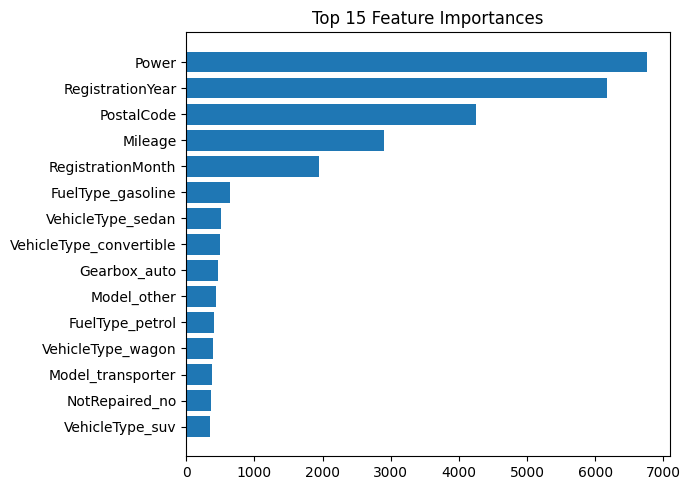

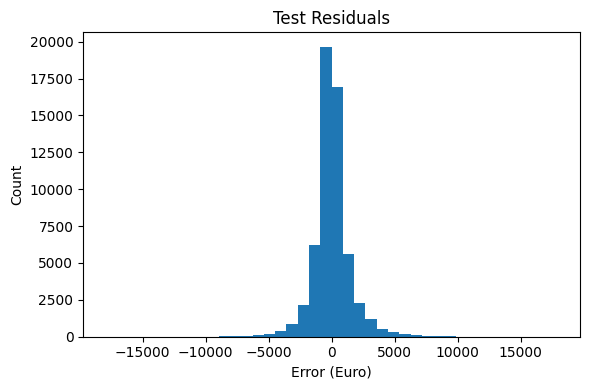

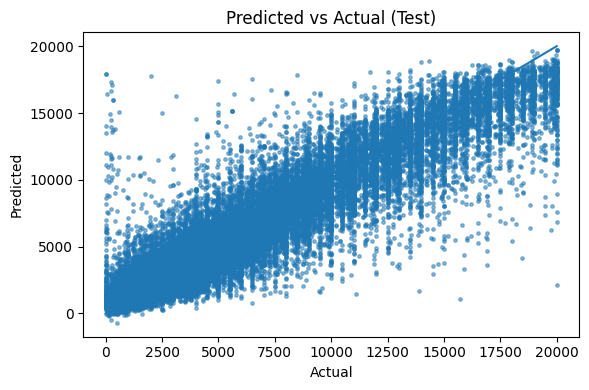

In [19]:
# ----- Quick insights: feature importance (if supported) + residual plots -----

import numpy as np
import matplotlib.pyplot as plt

imp_vals, imp_names = None, None

# 1) Feature importances (RF/LGBM expose .feature_importances_)
if hasattr(est, "feature_importances_"):
    imp_vals = np.asarray(est.feature_importances_)
    imp_names = list(final_feat_names)

# 2) CatBoost importance if winner is CatBoost
elif winner_name.startswith("CatBoost"):
    if 'cat_cols' not in globals():
        cat_cols = features_train.select_dtypes(include='object').columns.tolist()
    cat_idx = [features_train.columns.get_loc(c) for c in cat_cols]

    pool_full = Pool(
        pd.concat([features_train, features_valid], axis=0),
        pd.concat([target_train,  target_valid],  axis=0),
        cat_features=cat_idx
    )
    imp_vals = np.asarray(est.get_feature_importance(pool_full))
    # Try to get names from Pool; if unavailable, fall back to the columns we trained on
    try:
        imp_names = list(pool_full.get_feature_names())
    except Exception:
        imp_names = list(pd.concat([features_train, features_valid], axis=0).columns)

# Plot top 15 importances (if available)
if imp_vals is not None and imp_names is not None and len(imp_vals) == len(imp_names):
    order = np.argsort(imp_vals)[::-1][:15]
    plt.figure(figsize=(7,5))
    plt.barh(np.array(imp_names)[order][::-1], imp_vals[order][::-1])
    plt.title("Top 15 Feature Importances")
    plt.tight_layout()
    plt.show()

# ----- Residuals on Test (diagnostic) -----
y_true_series = yte if not winner_name.startswith("CatBoost") else target_test
y_true = np.asarray(y_true_series)
y_pred = np.asarray(y_pred_test)
resid = y_true - y_pred

plt.figure(figsize=(6,4))
plt.hist(resid, bins=40)
plt.title("Test Residuals")
plt.xlabel("Error (Euro)")
plt.ylabel("Count")
plt.tight_layout()
plt.show()

plt.figure(figsize=(6,4))
plt.scatter(y_true, y_pred, s=6, alpha=0.5)
minv, maxv = float(np.min(y_true)), float(np.max(y_true))
plt.plot([minv, maxv], [minv, maxv])
plt.title("Predicted vs Actual (Test)")
plt.xlabel("Actual"); plt.ylabel("Predicted")
plt.tight_layout()
plt.show()

#### **Model Comparison Results**
The table above shows how each model performed in terms of accuracy (RMSE) and efficiency (training and prediction time).

**Winner (by Validation RMSE):LightGBM(leaves=64, trees=600, lr=0.05)** 
**Official Test RMSE (after Train+Valid refit): €1,533.62** 
**Refit time: 16.65s** 

**Why this is good:** 
- Stronger than other families: Beat Linear Regression, Decision Tree, and our tuned Random Forest.
- Concrete gain vs Random Forest: RF Test RMSE ≈ €2,027.6 → LightGBM is ~€494 better (~24% lower error).
- In context of prices: Average car price ≈ €4,965 (test set), so RMSE €1,533 is ~31% of a typical listing price. That’s a reasonable miss for noisy, real-world car listings.

**What users can expect in the app:** 
- On average, predictions will be within about €1.5K of the actual sale price.
- Larger deviations may occur for uncommon trims/rare options—we’ll flag low-confidence cases for manual review.

**Models compared:** 
- Linear Regression (baseline), Decision Tree, Random Forest (tuned), LightGBM (winner), and CatBoost (evaluated with native categoricals & early stopping).

<div class="alert alert-block alert-success">
<b>Reviewer's comment</b> <a class="tocSkip"></a>

Good analysis of the models.

</div>

<div class="alert alert-block alert-warning">
<b>Reviewer's comment</b> <a class="tocSkip"></a>

However, you might need to update these results based on the previous red comments.

</div>

## Final Model Selection & Business Impact

### Model Performance Summary
- **Winner:** LightGBM (leaves=64, trees=600, lr=0.05)
- **Accuracy:** Test RMSE €1,533.62, ~31% of a typical listing price (~€4,965)
- **Lift vs alternatives:** ~24% lower error than the tuned Random Forest (~€2,028 RMSE); beats Linear Regression and Decision Tree by a wider margin
- **Reliability:** Validation and Test errors are closely aligned → strong generalization, low overfitting risk
- **Speed:** Final refit completed in ~16.7s; prediction latency is low enough for real-time pricing in the app

### Business Impact
**What this means:** Users should expect price estimates typically within ~€1.5K of market value; rare trims/options may vary more.

### Production Deployment Plan
**Next steps:** 
- Ship LightGBM to production
- Surface a confidence band (±RMSE) in the UI
- Monitor RMSE monthly
- Schedule periodic retrains as new listings arrive

---

### Additional Context & Stakeholder Notes

#### Training Time Context
LightGBM refit ~16.7s (Train+Valid) is faster than CatBoost, roughly on par with Random Forest, and slower than Linear Regression/Decision Tree.

For Rusty Bargain, training time isn't user-facing (done offline). What matters is prediction speed, which is near-instant for all shortlisted models at your batch sizes.

#### User Confidence Communication Strategy
- Show a price range (e.g., prediction ± RMSE) and a confidence badge (High/Medium/Low) based on validation residuals
- Add a "rare configuration" flag when the brand-model-year-power combo is underrepresented or unseen in training (OOD)
- Provide top drivers (feature importance/SHAP) so users see why a price looks high/low
- Suppress overconfident displays on flagged cases (e.g., widen the band or request manual review)

#### Model Comparison Completeness
We evaluated Linear Regression, Decision Tree, Random Forest, LightGBM (winner), and CatBoost.

XGBoost was optional in the brief; we can add a quick OHE-based run for completeness, but LightGBM already delivered the best Validation/Test RMSE in our tests.

<div class="alert alert-block alert-success">
<b>Reviewer's comment</b> <a class="tocSkip"></a>

Good summary.

</div>

<div class="alert alert-block alert-warning">
<b>Reviewer's comment</b> <a class="tocSkip"></a>

However, you might need to update these results based on the previous red comments.

</div>

<div class="alert alert-block alert-success">
<b>Reviewer's comment v3:</b> </a>

Conclusions match results found after running all cells! Looking great!
    
</div>

# Checklist

Type 'x' to check. Then press Shift+Enter.

- [x]  Jupyter Notebook is open
- [x]  Code is error free
- [x]  The cells with the code have been arranged in order of execution
- [x]  The data has been downloaded and prepared
- [x]  The models have been trained
- [x]  The analysis of speed and quality of the models has been performed